## Vectorization

In [117]:
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### 1. Load Data

#### Open-ended Answers

In [118]:
activities = pd.read_csv('./data/activities.csv')

In [119]:
health = pd.read_csv('./data/health.csv')

In [120]:
home_safety = pd.read_csv('./data/home_safety.csv')

In [121]:
quantity_learning = pd.read_csv('./data/quantity_learning.csv')

In [122]:
radio_lessons = pd.read_csv('./data/radio_lessons.csv')

In [123]:
radio_likes = pd.read_csv('./data/radio_likes.csv')

In [124]:
school_safety = pd.read_csv('./data/school_safety.csv')

In [125]:
schoolwork = pd.read_csv('./data/schoolwork.csv')

In [126]:
learning_mat = pd.read_csv('./data/learning_mat.csv')

In [127]:
radio_school = pd.read_csv('./data/radio_school.csv')

## 2. Count vectorization function
Retrieve bigrams tokens, refine and encode

In [128]:
stopwords = stopwords.words('english')

In [129]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [130]:
def bow_vectorization(data, n_grams):
    vectorizer = CountVectorizer(stop_words = stopwords, lowercase = True, strip_accents='unicode', ngram_range=n_grams, preprocessor=removal)
    data_tokens = vectorizer.fit_transform(data.dropna())
    print(len(vectorizer.vocabulary_),'words in dictionary.')
    return pd.DataFrame(data_tokens.todense(), columns=vectorizer.get_feature_names())

## 3. Questions to vectorize

### 3.1. Are you doing other things at home to learn, aside from radio lessons? What are you doing?

Only those who answered "Yes" explained later what they were doing.

In [153]:
# Yes answer
activities[activities.iloc[:,0] == 'Yes'].notnull().sum()

Q34_Are you doing other things at home to learn, aside from radio lessons?    1499
Q35_What are you doing?                                                       1499
dtype: int64

In [152]:
# No answer
activities[activities.iloc[:,0] == 'No'].notnull().sum()

Q34_Are you doing other things at home to learn, aside from radio lessons?    1011
Q35_What are you doing?                                                          0
dtype: int64

Bigram vectorization

In [133]:
activities_bi = bow_vectorization(data = activities.iloc[:,-1], n_grams=(2, 2))

1149 words in dictionary.


In [134]:
activities_bi.sum().sort_values(ascending=False)[:30]

reading books        92
reading notes        47
text books           44
reading textbooks    35
previous work        32
read books           32
reading text         31
revising books       30
holiday package      29
study books          29
revising notes       25
group discussion     25
previous lessons     20
revised previous     16
studying books       16
revise books         15
exercise books       15
fetching water       14
revising previous    13
holiday packages     13
reading home         12
free time            11
work reading         11
home work            11
reading holiday      10
notes books          10
previous notes       10
old notes            10
house activities     10
looking goats        10
dtype: int64

See and group most important answers

In [135]:
activities_bi['reading'] = activities_bi[['reading previous','reading home','reading book','reading books', 'reading notes', 'text books', 'reading textbooks', 'read books', 'reading text', 'reading textbooks','reading holiday']].sum(axis=1)
activities_bi.drop(['reading previous','reading home','reading book','reading books', 'reading notes', 'text books', 'reading textbooks', 'read books', 'reading text', 'reading textbooks','reading holiday'], axis=1, inplace=True)

In [136]:
activities_bi['revising'] = activities_bi[['revised previous','previous lessons','revise previous','revising notes', 'revising books', 'revise books', 'revising previous','revising books', 'study books','old notes', 'previous notes']].sum(axis=1)
activities_bi.drop(['revised previous','previous lessons','revise previous','revising notes', 'revising books', 'revise books', 'revising previous','revising books', 'study books','old notes', 'previous notes'], axis=1, inplace=True)

In [137]:
activities_bi['reading'].sum(), activities_bi['revising'].sum()

(346, 190)

In [138]:
activities_bi.sum().sort_values(ascending=False)[:30]

reading                346
revising               190
previous work           32
holiday package         29
group discussion        25
revised previous        16
studying books          16
exercise books          15
fetching water          14
holiday packages        13
work reading            11
free time               11
home work               11
notes books             10
looking goats           10
house activities        10
books home               9
domestic work            9
personal studies         9
studying home            9
self studies             8
fetch water              8
garden work              8
reading playing          7
reading previous         7
practicing previous      7
notes school             7
group studies            7
cooking fetching         7
playing foot             7
dtype: int64

Visualization

In [241]:
plt.figure(figsize=(10,5))
plt.bar(activities_bi.sum().sort_values(ascending=False).index[:20], activities_bi.sum().sort_values(ascending=False).values[:20])
plt.title('bigrams')
plt.xticks(rotation=45, ha='right')
plt.show()

### 2. Do you feel worried about your health due to studying/being at home during COVID-19? Why or why not?

In [164]:
health.iloc[:,0].value_counts()

Yes         772
No          528
Somewhat     75
Name: Q46_Do you feel worried about your health due to studying/being at home during COVID-19?, dtype: int64

Group 'Yes' and 'Somewhat' answers and separate them from the negative answers

In [191]:
health_yes = health[(health.iloc[:,0] == 'Yes') | (health.iloc[:,0] == 'Somewhat')].iloc[:,1]

In [192]:
health_no = health[health.iloc[:,0] == 'No'].iloc[:,1]

Bigram vectorization

In [212]:
health_yes_bi = bow_vectorization(data = health_yes, n_grams=(2, 4))

2991 words in dictionary.


In [213]:
health_no_bi = bow_vectorization(data = health_no, n_grams=(2, 2))

701 words in dictionary.


In [214]:
health_yes_bi.sum().sort_values(ascending=False)[:25]

corona virus                    34
covid infection                 23
want live                       22
lot things                      15
missing lot things              13
missing lot                     13
among people                    13
infection among                 12
staying home                    12
infection among people          12
covid infection among           11
covid infection among people    11
deadly disease                   9
dangerous disease                8
schools closed                   8
social distancing                7
kills people                     7
worried covid                    7
fear covid                       7
virus dangerous                  7
want infected                    6
many people                      6
due covid                        6
safe home                        6
study well                       6
dtype: int64

In [221]:
health_yes_bi['covid'] = health_yes_bi[['corona virus','covid infection','worried covid','fear covid','want infected','due covid']].sum(axis=1)
health_yes_bi.drop(['corona virus','covid infection','worried covid','fear covid','want infected','due covid'],axis=1, inplace=True)

In [226]:
health_yes_bi['missing lot things'] = health_yes_bi[['missing lot things','lot things','missing lot']].sum(axis=1)
health_yes_bi.drop(['missing lot things','lot things','missing lot'], axis=1, inplace=True)

In [227]:
health_yes_bi['infection among people'] = health_yes_bi[['infection among people','infection among','among people']].sum(axis=1)
health_yes_bi.drop(['infection among people','infection among','among people'], axis=1, inplace=True)

In [228]:
health_no_bi.sum().sort_values(ascending=False)[:26]

safe home                 56
home safe                 34
stay home                 24
feel safe                 19
staying home              16
home stay                 13
preventive measures       13
stay safe                 12
able protect              10
home safety                9
preventives measures       9
social distance            9
social distancing          7
following preventive       7
protect self               6
safe healthy               6
contact people             5
wash hands                 5
protect covid              5
corona virus               4
people home                4
family members             4
precautionary measures     3
home safer                 3
keeping social             3
died coronas               3
dtype: int64

In [230]:
health_no_bi['stay home'] = health_no_bi[['safe home','home safe', 'stay home','home stay','home safety','people home','home safer']].sum(axis=1)
health_no_bi.drop(['safe home','home safe', 'home stay','home safety','people home','home safer'], axis=1, inplace=True)

In [232]:
health_no_bi['social distance'] = health_no_bi[['social distance', 'social distancing']].sum(axis=1)
health_no_bi.drop('social distancing', axis=1, inplace=True)

Visualization

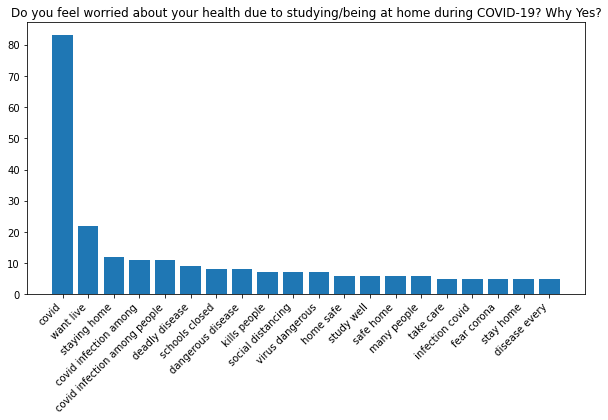

In [245]:
plt.figure(figsize=(10,5))
plt.bar(health_yes_bi.sum().sort_values(ascending=False).index[:20], health_yes_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your health due to studying/being at home during COVID-19? Why Yes?')
plt.xticks(rotation=45, ha='right')
plt.show()

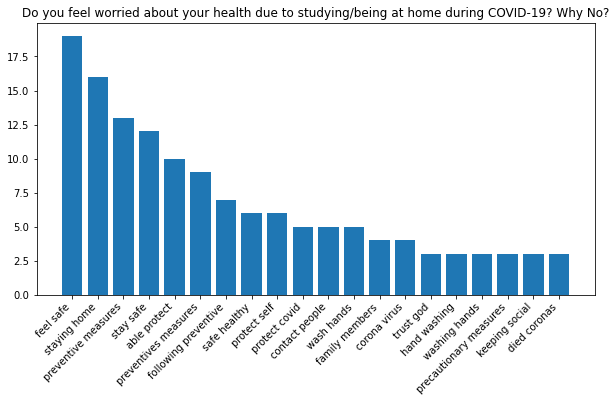

In [246]:
plt.figure(figsize=(10,5))
plt.bar(health_no_bi.sum().sort_values(ascending=False).index[:20], health_no_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your health due to studying/being at home during COVID-19? Why No?')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Do you feel worried about your safety due to being at home during COVID-19? Why or why not?

In [253]:
home_safety.iloc[:,0].value_counts()

Yes         666
No          648
Somewhat     61
Name: Q48_Do you feel worried about your safety due to being at home during COVID-19?, dtype: int64

Group 'Yes' and 'Somewhat' answers and separate them from the negative answers

In [254]:
home_safety_yes = home_safety[(home_safety.iloc[:,0] == 'Yes') | (home_safety.iloc[:,0] == 'Somewhat')].iloc[:,1]

In [255]:
home_safety_no = home_safety[home_safety.iloc[:,0] == 'No'].iloc[:,1]

Bigram vectorization

In [259]:
home_safety_yes_bi = bow_vectorization(data = home_safety_yes, n_grams=(2, 3))
home_safety_no_bi = bow_vectorization(data = home_safety_no, n_grams=(2, 3))

1936 words in dictionary.
1252 words in dictionary.


In [260]:
home_safety_yes_bi.sum().sort_values(ascending=False)[:25]

corona virus                 43
staying home                 15
fear corona                  14
disease affect               13
come home                    12
fear corona virus            11
safe home                    11
movements people             11
pandemic everywhere          11
fear disease                 11
social distancing            10
affect everywhere            10
people home                   9
want infected                 9
feel safe                     8
home safe                     8
staying home safe             7
many people                   7
feel safe home                7
dangerous disease             7
bring virus                   7
disease affect everywhere     7
people come                   7
people visit                  6
may bring                     6
dtype: int64

In [262]:
home_safety_yes_bi['covid'] = home_safety_yes_bi[['corona virus','fear corona','fear corona virus']].sum(axis=1)
home_safety_yes_bi.drop(['corona virus','fear corona','fear corona virus'], axis=1, inplace=True)

In [264]:
home_safety_yes_bi['safe home '] = home_safety_yes_bi[['feel safe','feel safe','home safe','staying home safe','feel safe home']].sum(axis=1)
home_safety_yes_bi.drop(['feel safe','feel safe','home safe','staying home safe','feel safe home'], axis=1, inplace=True)

In [265]:
home_safety_no_bi.sum().sort_values(ascending=False)[:25]

safe home                74
home safe                49
feel safe                34
social distancing        30
stay home                30
feel safe home           26
staying home             22
preventive measures      18
stay safe                17
safety measures          16
home stay                15
stay home stay           15
home stay safe           15
staying home safe        14
social distance          12
wash hands               10
home safety               9
safe healthy              9
home safe healthy         8
safety measures covid     7
washing hands             7
measures covid            7
take care                 6
come contact              5
following preventive      5
dtype: int64

In [269]:
home_safety_no_bi['safe home'] = home_safety_no_bi[['safe home', 'home safe', 'feel safe', 'stay home','stay safe','home stay','stay home stay','home stay safe','staying home safe','home safety','home safe healthy']].sum(axis=1)
home_safety_no_bi.drop(['home safe', 'feel safe', 'stay home','stay safe','home stay','stay home stay','home stay safe','staying home safe','home safety','home safe healthy'], axis=1, inplace=True)

Visualization

In [272]:
plt.figure(figsize=(10,5))
plt.bar(home_safety_yes_bi.sum().sort_values(ascending=False).index[:20], home_safety_yes_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your safety due to being at home during COVID-19? Why or why not?')
plt.xticks(rotation=45, ha='right')
plt.show()

In [274]:
plt.figure(figsize=(10,5))
plt.bar(home_safety_no_bi.sum().sort_values(ascending=False).index[:20], home_safety_no_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your safety due to being at home during COVID-19? Why or why not?')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4. Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why

In [33]:
quantity_learning_1 = bow_vectorization(data = quantity_learning.iloc[:,2], n_grams=(2, 3))
quantity_learning_2 = bow_vectorization(data = quantity_learning.iloc[:,2], n_grams=(1, 1))

2971 words in dictionary.
708 words in dictionary.


In [34]:
quantity_learning_1.sum().sort_values(ascending=False)[:25]

radio lessons           64
domestic work           36
radio home              34
engaged activities      28
time enough             25
listen radio            19
access radio            18
work home               17
time short              14
much work               14
time radio              13
engaged domestic        12
community activities    10
lack radio              10
much concentration      10
hard understand         10
radio program           10
time listen              9
lessons radio            8
domestic works           8
listening radio          8
lack radios              8
sometimes radio          8
difficult understand     7
radio lesson             7
dtype: int64

In [ ]:
borrar radio lessons

In [35]:
quantity_learning_2.sum().sort_values(ascending=False)[:25]

radio         337
time          190
lessons       138
home          130
work          103
school         84
enough         69
radios         60
activities     60
understand     58
sometimes      54
engaged        50
teacher        50
domestic       48
teachers       48
learners       45
much           42
learning       37
lack           36
listen         34
short          32
know           32
busy           31
less           30
program        28
dtype: int64

In [36]:
words_graph = [dict(quantity_learning_1.sum().sort_values(ascending=False)[:20])] + [dict(quantity_learning_2.sum().sort_values(ascending=False)[:20])]

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [38]:
quantity_learning_stop_words = ['teachers','learning']

#### 5. What is the quality of the radio lessons? How can the radio lessons be improved?

In [39]:
radio_lessons_1 = bow_vectorization(data = radio_lessons.iloc[:,2], n_grams=(2, 3))
radio_lessons_2 = bow_vectorization(data = radio_lessons.iloc[:,2], n_grams=(1, 1))

4957 words in dictionary.
813 words in dictionary.


In [40]:
radio_lessons_1.sum().sort_values(ascending=False)[:25]

radio lessons               50
distribution radios         46
provision radios            39
radio coverage              35
radios learners             31
enough time                 31
radio distributed           25
provide radio               24
extension radio             23
extension radio coverage    23
radio needed                22
distributing radios         20
distribution radio          20
increase time               20
provide radios              20
radio learners              19
radios students             18
radio stations              17
time lessons                15
distribute radios           15
providing radios            14
give time                   13
given learners              13
local radios                13
provision radio             13
dtype: int64

In [41]:
radio_lessons_2.sum().sort_values(ascending=False)[:25]

radio           388
radios          292
time            230
lessons         145
learners        139
need             93
distribution     88
teachers         82
provide          71
coverage         67
provision        66
network          62
schools          60
lesson           57
improve          54
local            45
enough           45
increase         43
know             41
given            40
extension        40
students         40
improved         40
good             37
school           37
dtype: int64

In [42]:
words_graph = [dict(radio_lessons_1.sum().sort_values(ascending=False)[:20])] + [dict(radio_lessons_2.sum().sort_values(ascending=False)[:20])]

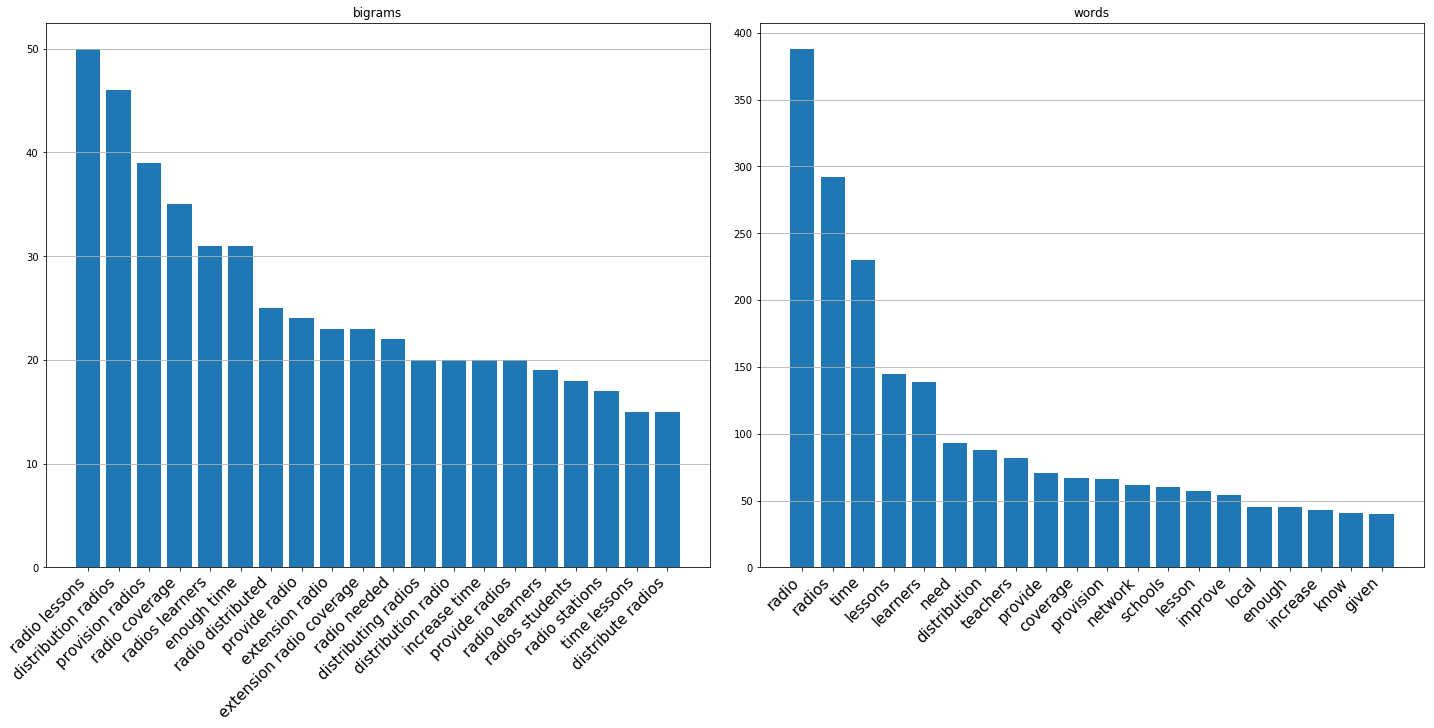

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.show()

#### More stop-words

In [44]:
radio_lessons_stop_words = ['radios','school']

#### 6. What do you like most about the radio lessons? What are the challenges with learning on the radio?

In [45]:
radio_likes_1 = bow_vectorization(data = radio_likes.iloc[:,2], n_grams=(2, 3))
radio_likes_2 = bow_vectorization(data = radio_likes.iloc[:,2], n_grams=(1, 1))

5618 words in dictionary.
862 words in dictionary.


In [46]:
radio_likes_1.sum().sort_values(ascending=False)[:25]

lack radios                45
lack radio                 40
radio lessons              36
ask questions              30
radio battery              29
network problem            27
poor network               25
radio home                 22
limited time               20
hard understand            19
time enough                17
radio coverage             17
difficult ask              17
difficult understand       17
time limited               16
net work                   15
radio program              14
asking questions           13
ask question               13
lack power                 13
access radio               12
difficult ask questions    12
sometimes radio            12
asks questions             11
time short                 11
dtype: int64

In [47]:
radio_likes_2.sum().sort_values(ascending=False)[:25]

radio         404
time          199
lack          149
radios        122
lessons       107
understand    107
network       106
power          89
questions      87
sometimes      85
poor           85
battery        81
learners       78
difficult      65
ask            63
teacher        57
enough         51
teachers       51
fast           49
problem        47
hard           46
lesson         46
phone          46
challenges     41
limited        40
dtype: int64

In [48]:
words_graph = [dict(radio_likes_1.sum().sort_values(ascending=False)[:20])] + [dict(radio_likes_2.sum().sort_values(ascending=False)[:20])]

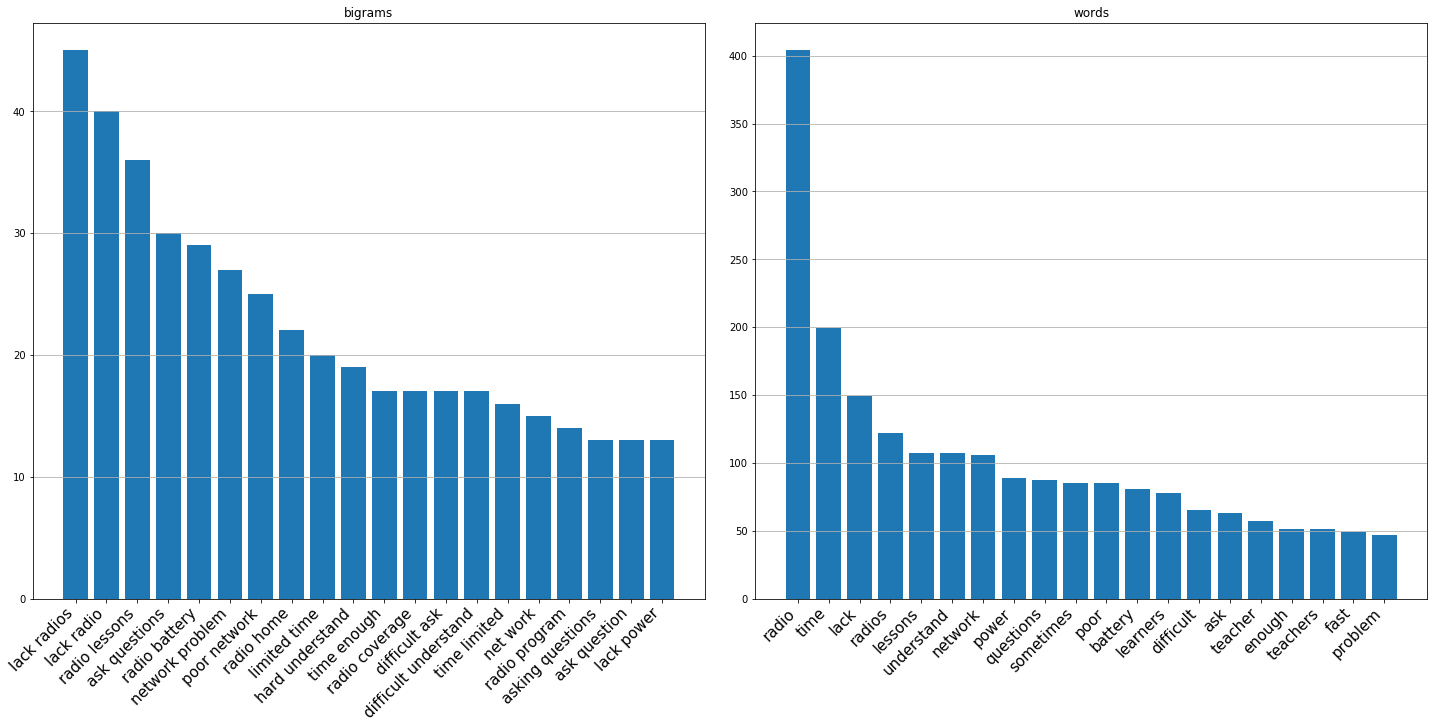

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [50]:
radio_likes_stop_words = ['radios','lesson']

#### 7.a. When schools re-open, do you think your school will have measures in place to ensure a safe learning environment? Why or why not?

In [51]:
school_safety.iloc[:,[1,2]]

Q61_When schools re-open, do you think your school will have measures in place to ensure a safe learning environment?  \
0                                                   Yes                                                                      
1                                                   Yes                                                                      
2                                              Somewhat                                                                      
3                                                   Yes                                                                      
4                                                   Yes                                                                      
...                                                 ...                                                                      
4722                                                Yes                                                                      
4723                                                Yes                                                                      
4724                                                Yes                                                                      
4725                                                Yes                                                                      
4726                                                Yes                                                                      

                                    Q62_Why or why not?  
0     Because we shall follow classroom rules and sc...  
1     Creation of structures and routines in the school  
2                       Keeping classroom clean orderly  
3                    Creation of classroom safety rules  
4         Following the rules and regulations of school  
...                                                 ...  
4722           The teachers will give proper guidelines  
4723              The teachers will direct the Learners  
4724  The teachers will guide the Learners to stay safe  
4725  The SMC members will work together with the te...  
4726  The teachers will guide the Learners and accom...  

[4727 rows x 2 columns]

In [52]:
school_safety_1 = bow_vectorization(data = school_safety.iloc[:,2], n_grams=(2, 3))
school_safety_2 = bow_vectorization(data = school_safety.iloc[:,2], n_grams=(1, 1))

9008 words in dictionary.
1196 words in dictionary.


In [53]:
school_safety_1.sum().sort_values(ascending=False)[:25]

hand washing                    203
washing facilities              190
hand washing facilities         142
social distancing               131
school administration           108
social distance                  86
ensure safety                    85
school environment               83
safety learners                  78
administration ensure            75
school administration ensure     75
ensure safety learners           74
administration ensure safety     69
measures covid                   65
face masks                       65
preventive measures              61
face mask                        59
corona virus                     59
measures place                   58
safe learning                    50
keep school                      46
put place                        42
keep social                      40
learning environment             39
know school                      39
dtype: int64

In [54]:
school_safety_2.sum().sort_values(ascending=False)[:25]

school            1057
know               637
covid              345
measures           319
facilities         316
washing            302
environment        236
social             235
hand               231
learners           230
safe               221
teachers           204
place              202
safety             192
keep               153
distancing         144
learning           135
ensure             134
face               131
put                130
corona             124
enough             120
sure               118
administration     115
clean              114
dtype: int64

In [55]:
words_graph = [dict(school_safety_1.sum().sort_values(ascending=False)[:20])] + [dict(school_safety_2.sum().sort_values(ascending=False)[:20])]

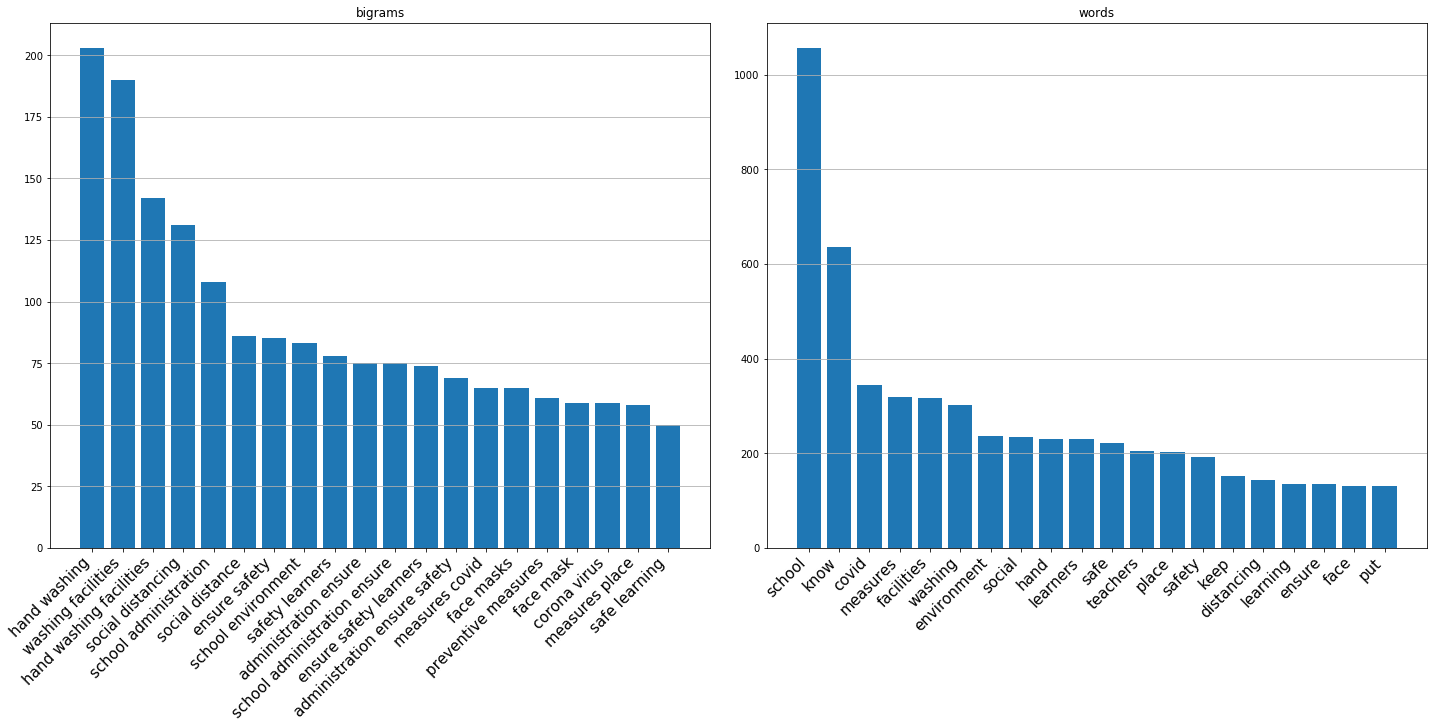

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [57]:
school_safety_stop_words = ['safety']

#### 7.b. What are your concerns about returning to school?

In [58]:
school_safety_1b = bow_vectorization(data = school_safety.iloc[:,3], n_grams=(2, 3))
school_safety_2b = bow_vectorization(data = school_safety.iloc[:,3], n_grams=(1, 1))

10312 words in dictionary.
1303 words in dictionary.


In [59]:
school_safety_1b.sum().sort_values(ascending=False)[:25]

back school               432
go back                   407
go back school            340
school open               196
schools open              186
schools reopen            170
corona virus              168
let schools               148
corona virus infection    108
virus infection           108
continue studies          106
children go               100
virus infection fear       96
infection fear             96
school reopen              90
children go back           80
ready go                   79
let schools reopen         75
ready go back              72
next year                  71
need school                70
return school              69
reopen schools             67
schools opened             63
let schools open           58
dtype: int64

In [60]:
school_safety_2b.sum().sort_values(ascending=False)[:25]

school        1332
schools        679
back           530
go             486
open           468
reopen         380
good           365
children       364
need           308
let            270
continue       220
want           217
studies        192
corona         189
virus          176
learning       167
year           155
learn          153
ready          149
learners       133
government     130
fear           130
concern        116
education      112
infection      112
dtype: int64

In [61]:
words_graph = [dict(school_safety_1b.sum().sort_values(ascending=False)[:20])] + [dict(school_safety_2b.sum().sort_values(ascending=False)[:20])]

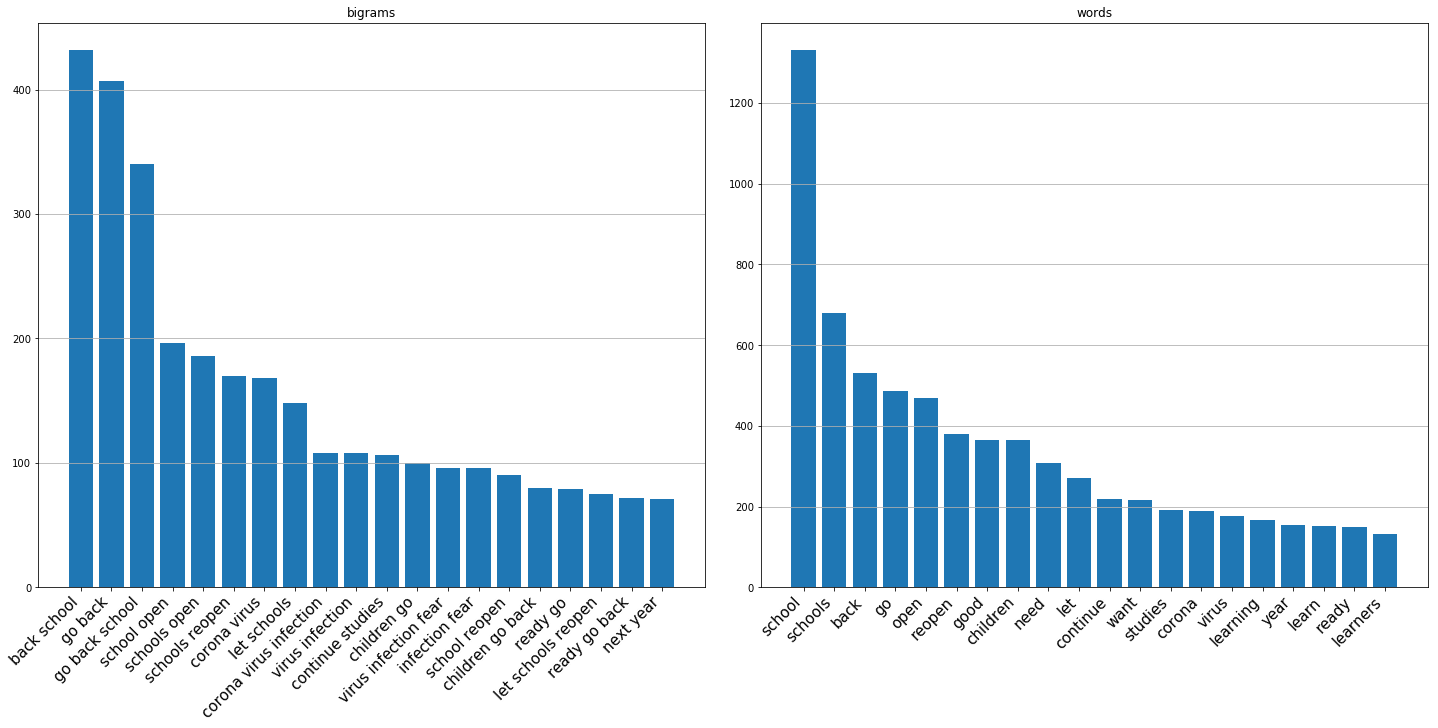

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [63]:
school_safety_b_stop_words = ['schools','go','back','reopen','let']

#### 8. Are you/your learners doing more schoolwork or less schoolwork since the COVID-19 school closures? Why?

In [64]:
schoolwork_1 = bow_vectorization(data = schoolwork.iloc[:,-1], n_grams=(2, 3))
schoolwork_2 = bow_vectorization(data = schoolwork.iloc[:,-1], n_grams=(1, 1))

3343 words in dictionary.
744 words in dictionary.


In [65]:
schoolwork_1.sum().sort_values(ascending=False)[:25]

domestic work           65
work home               61
engaged activities      34
additional work         17
schools closed          16
radio lessons           15
lot work                15
much work               14
home activities         14
extra work              14
house work              14
home work               13
additional work home    12
activities home         12
engaged domestic        12
extra work home         11
much domestic work      11
much domestic           11
school work             11
garden work             10
heard get                9
present teacher          9
busy home                9
time engaged             9
much work home           8
dtype: int64

In [66]:
schoolwork_2.sum().sort_values(ascending=False)[:25]

home          236
work          232
school        179
time          130
activities    103
domestic       76
radio          71
teachers       71
engaged        71
learners       59
teacher        59
much           58
schools        52
enough         48
help           45
learning       43
lessons        42
busy           40
things         36
children       36
materials      34
lot            31
lack           29
one            28
due            28
dtype: int64

In [67]:
words_graph = [dict(schoolwork_1.sum().sort_values(ascending=False)[:20])] + [dict(schoolwork_2.sum().sort_values(ascending=False)[:20])]

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [69]:
schoolwork_stop_words = ['home','teacher','schools','one']

#### 9. When schools reopen, would you still listen to radio lessons? Why or why not?

In [70]:
radio_school_1 = bow_vectorization(data = radio_school.iloc[:,-1], n_grams=(2, 3))
radio_school_2 = bow_vectorization(data = radio_school.iloc[:,-1], n_grams=(1, 1))

2781 words in dictionary.
585 words in dictionary.


In [71]:
radio_school_1.sum().sort_values(ascending=False)[:25]

radio lessons               55
busy school                 31
get knowledge               27
teachers school             26
teachers already            22
school open                 22
time listen                 19
listen radio                19
school teach                18
school opened               17
going school                16
get information             15
add knowledge               14
radio lesson                14
teachers school teach       14
additional knowledge        13
teachers already schools    13
taught school               13
go school                   13
already schools             13
school lessons              13
learn radio                 11
lessons school              11
increase knowledge          11
listening radio             11
dtype: int64

In [72]:
radio_school_2.sum().sort_values(ascending=False)[:25]

school         316
radio          175
lessons        159
knowledge      135
time           126
get            104
teachers        93
learn           85
busy            70
information     68
learners        62
class           61
schools         55
children        53
learning        52
need            52
listen          51
lesson          46
good            44
help            42
concentrate     34
teaching        34
listening       34
want            33
things          32
dtype: int64

In [73]:
words_graph = [dict(radio_school_1.sum().sort_values(ascending=False)[:20])] + [dict(radio_school_2.sum().sort_values(ascending=False)[:20])]

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [75]:
radio_school_stop_words = ['get','learning','listening']

#### 10. What materials are you using? How often do you use these materials? Do you find these materials more or less helpful than radio lessons? Why?

In [76]:
learning_mat_1 = bow_vectorization(data = learning_mat.iloc[:,-1], n_grams=(2, 3))
learning_mat_2 = bow_vectorization(data = learning_mat.iloc[:,-1], n_grams=(1, 1))

3547 words in dictionary.
719 words in dictionary.


In [77]:
learning_mat_1.sum().sort_values(ascending=False)[:25]

easy understand          82
radio lessons            82
well summarized          24
listen radio             24
radio lesson             24
text books               17
previous work            15
understand radio         15
listening radio          15
keeps busy               15
domestic work            14
present teacher          14
enough time              13
understand better        13
like reading             13
helpful radio            13
one help                 12
taught school            12
like radio               12
radio home               12
text book                11
helpful radio lessons    11
teacher good             10
time radio               10
hard understand          10
dtype: int64

In [78]:
learning_mat_2.sum().sort_values(ascending=False)[:25]

radio         323
understand    219
lessons       123
time          107
easy           97
teacher        92
one            86
school         81
home           74
reading        70
read           67
help           67
enough         66
work           64
books          59
better         48
like           45
well           44
things         42
get            40
good           40
keeps          37
helpful        35
lesson         33
alone          32
dtype: int64

In [79]:
words_graph = [dict(learning_mat_1.sum().sort_values(ascending=False)[:20])] + [dict(learning_mat_2.sum().sort_values(ascending=False)[:20])]

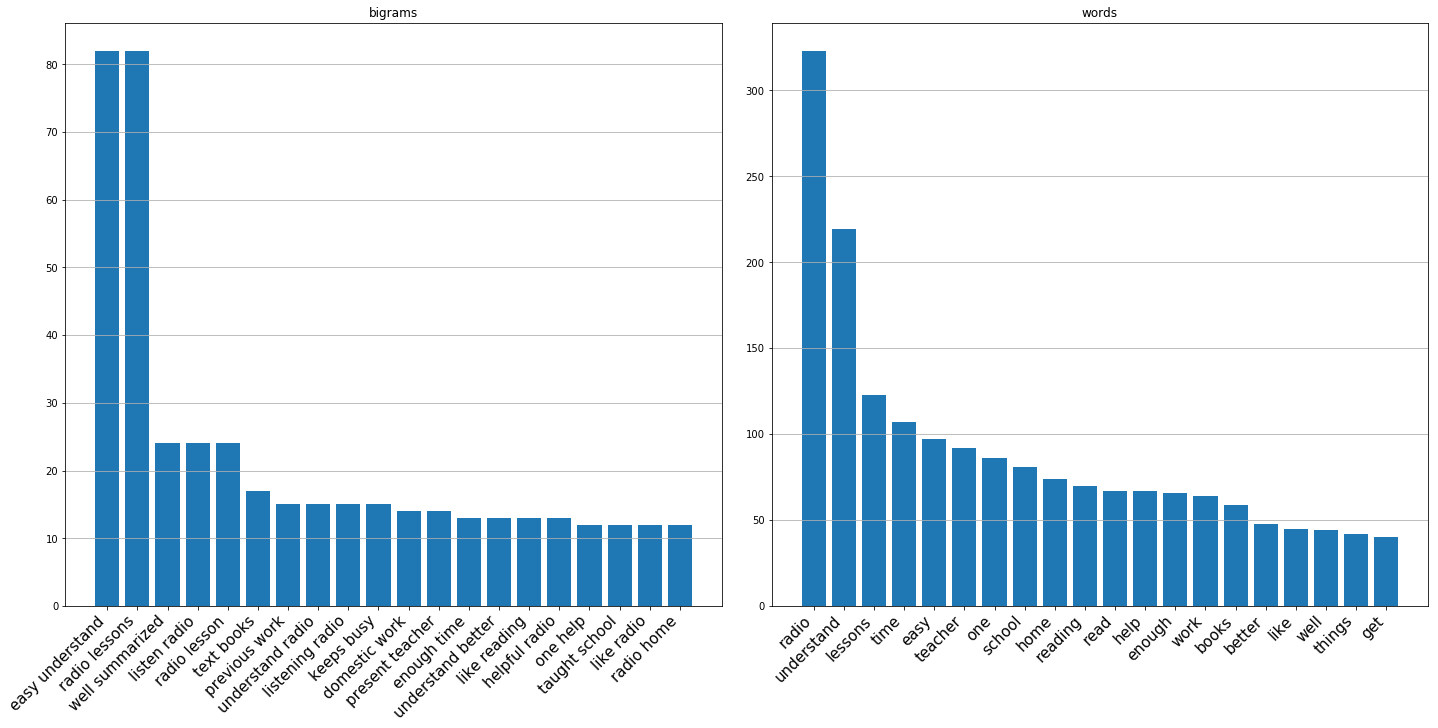

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [81]:
learning_mat_stop_words = ['read']

## Bag of Words refinement

In [82]:
activities_2.drop(activities_stop_words, axis=1, inplace=True)
activities_2.to_csv('data/tokens/activities_tokens.csv')

In [83]:
health_2.drop(health_stop_words, axis=1, inplace=True)
health_2.to_csv('data/tokens/health_tokens.csv')

In [84]:
home_safety_2.drop(home_safety_stop_words, axis=1,inplace=True)
home_safety_2.to_csv('data/tokens/home_safety_tokens.csv')

In [85]:
quantity_learning_2.drop(quantity_learning_stop_words, axis=1, inplace=True)
quantity_learning_2.to_csv('data/tokens/quantity_learning_tokens.csv')

In [86]:
radio_lessons_2.drop(radio_lessons_stop_words, axis=1, inplace=True)
radio_lessons_2.to_csv('data/tokens/radio_lessons_tokens.csv')

In [87]:
radio_likes_2.drop(radio_likes_stop_words, axis=1,inplace=True)
radio_likes_2.to_csv('data/tokens/radio_likes_tokens.csv')

In [88]:
school_safety_2.drop(school_safety_stop_words, axis=1, inplace=True)
school_safety_2.to_csv('data/tokens/school_safety_tokens.csv')

In [89]:
school_safety_2b.drop(school_safety_stop_words, axis=1, inplace=True)
school_safety_2b.to_csv('data/tokens/school_safety_b_tokens.csv')

In [90]:
schoolwork_2.drop(schoolwork_stop_words, axis=1, inplace=True)
schoolwork_2.to_csv('data/tokens/schoolwork_tokens.csv')

In [91]:
learning_mat_2.drop(learning_mat_stop_words, axis=1, inplace=True)
learning_mat_2.to_csv('data/tokens/learning_mat_tokens.csv')

In [92]:
radio_school_2.drop(radio_school_stop_words, axis=1, inplace=True)
radio_school_2.to_csv('data/tokens/radio_school_tokens.csv')